In [1]:
from carps.analysis.run_autorank import calc_critical_difference, custom_latex_table, get_df_crit
from carps.analysis.utils import savefig, get_color_palette, filter_only_final_performance
from carps.analysis.gather_data import normalize_logs, get_interpolated_performance_df, load_logs, process_logs, load_set
import pandas as pd



paths = {
    "BBfull": {
        "full": [
        "../runs/SMAC3-BlackBoxFacade",
        "../runs/RandomSearch",
        "../runs/Nevergrad-CMA-ES",
    ]},
    "MFfull": {
        "full": [
        "../runs/SMAC3-Hyperband",
        "../runs/DEHB",
        "../runs/SMAC3-MultiFidelityFacade",
    ]},
    "MOfull": {
        "full": [
        "../runs_MO/Optuna-MO",
        "../runs_MO/RandomSearch",
        "../runs_MO/Nevergrad-DE",
    ]},
    "MOMFfull": {
        "full": [
        "../runs_MOMF/SMAC3-MOMF-GP",
        "../runs_MOMF/RandomSearch",
        "../runs_MOMF/Nevergrad-DE",
    ]},
    "BBsubset": {
        "dev": ["../runs_subset_BB/dev"],
        "test": ["../runs_subset_BB/test"],
    },
    "MFsubset": {
        "dev": ["../runs_subset_MF/dev"],
        "test": ["../runs_subset_MF/test"],
    },
    "MOsubset": {
        "dev": ["../runs_subset_MO/dev"],
        "test": ["../runs_subset_MO/test"],
    },
    "MOMFsubset": {
        "dev": ["../runs_subset_MOMF/dev"],
        "test": ["../runs_subset_MOMF/test"],
    },
}
subsets = ["BBfull", "BBsubset"]
optimizer_ids = ["RandomSearch", "SMAC3-BlackBoxFacade", "Nevergrad-CMA-ES"]
scenario = "blackbox"
# subsets = ["MOfull", "MOsubset"]
# scenario = "multiobjective"
# optimizer_ids = ["RandomSearch", "Optuna-MO", "Nevergrad-DE"]
# subsets = ["MFfull", "MFsubset"]
# scenario = "multifidelity"
# optimizer_ids = ["SMAC3-Hyperband", "SMAC3-MultiFidelityFacade", "DEHB"]
# subsets = ["MOMFfull", "MOMFsubset"]
# scenario = "MOMF"
# optimizer_ids = ["RandomSearch", "SMAC3-MOMF-GP", "Nevergrad-DE"]


D = []
for subset in subsets:
    print("loading", subset)
    loaded = [load_set(paths=ps, set_id=set_id) for set_id, ps in paths[subset].items()]
    df = pd.concat([d for d, _ in loaded]).reset_index(drop=True)
    df = df[df["optimizer_id"].isin(optimizer_ids)]
    D.append(df)
df = pd.concat(D).reset_index(drop=True)
df = normalize_logs(df)
del D

loading BBfull
loading BBsubset


[09:04:51] INFO     Start normalization...                                                       ]8;id=445268;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=373107;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#359\359]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=567570;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=148316;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#360\360]8;;\

[09:05:17] INFO     Normalize cost...                                                            ]8;id=503720;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=527508;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#362\362]8;;\

[09:05:43] INFO     Calc normalized incumbent cost...                                            ]8;id=898877;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=194490;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#371\371]8;;\

[09:06:17] INFO     Normalize time...                                                            ]8;id=792047;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=800861;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#377\377]8;;\

[09:07:59] INFO     Done.                                                                        ]8;id=403331;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=368530;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#380\380]8;;\

In [2]:
df.groupby("set")["optimizer_id"].unique()

set
dev     [Nevergrad-CMA-ES, SMAC3-BlackBoxFacade, Rando...
full    [SMAC3-BlackBoxFacade, RandomSearch, Nevergrad...
test    [Nevergrad-CMA-ES, SMAC3-BlackBoxFacade, Rando...
Name: optimizer_id, dtype: object

dev


[10:14:31] INFO     Lost following experiments: Empty DataFrame                                 ]8;id=797998;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=907937;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#113\113]8;;\
                    Columns: [Nevergrad-CMA-ES, RandomSearch, SMAC3-BlackBoxFacade]                                
                    Index: []                                                                                      

Rejecting null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.000665<0.016667)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.001306<0.016667)
Rejecting null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.013049<0.016667)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.
                      meanrank    median       mad  ci_lower  ci_upper  \
SMAC3-BlackBoxFacade  1.233333  0.258908  0.258908  0.036241  0.673415   
RandomSearch          2.083333  0.681025   0.28138  0.140162  0.964738   
Nevergrad-CMA-ES      2.683333  0.700379  0.259538  0.177805  0.970191   

                     effect_size   magnitude  
SMAC3-BlackBoxFacade         0.0  negligible  
RandomSearch           -1.053026       large  
Nevergrad-

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:233: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)],
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:241: FutureWarning: Series.__getitem__ treating ke

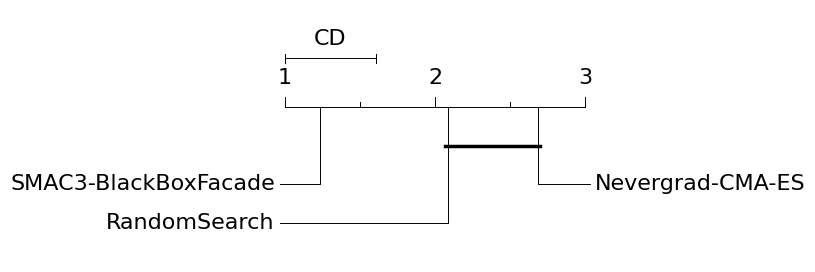

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/tmp/ipykernel_3735759/3381051715.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_ranks["set_id"] = set_id


SMAC3-BlackBoxFacade    1.233333
RandomSearch            2.083333
Nevergrad-CMA-ES        2.683333
set_id                       dev
Name: meanrank, dtype: object ['SMAC3-BlackBoxFacade', 'RandomSearch', 'Nevergrad-CMA-ES'] [(1, 2)]
full


[10:15:44] INFO     Lost following experiments: optimizer_id                  Nevergrad-CMA-ES  ]8;id=168812;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=430470;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#113\113]8;;\
                    RandomSearch  \                                                                                
                    problem_id                                                                                     
                    hpob/all/214/58                            NaN      0.000000                                   
                    hpob/all/243/59                            NaN      0.000000                                   
                    hpob/all/245/59                            NaN      0.000000                                   
                    hpob/all/246/59                            NaN      0.000000                                   
                    hpob/all/247/59                            NaN      0.000000                                   
                    ...                                        ...           ...                                   
                    yahpo/rbv2_xgboost/54/None                 NaN      0.155655                                   
                    yahpo/rbv2_xgboost/554/None                NaN      0.000000                                   
                    yahpo/rbv2_xgboost/6/None                  NaN      0.000000                                   
                    yahpo/rbv2_xgboost/60/None                 NaN      0.115909                                   
                    yahpo/rbv2_xgboost/6332/None               NaN      0.187367                                   
                                                                                                                   
                    optimizer_id                  SMAC3-BlackBoxFacade                                             
                    problem_id                                                                                     
                    hpob/all/214/58                           0.000000                                             
                    hpob/all/243/59                           0.000000                                             
                    hpob/all/245/59                           0.000000                                             
                    hpob/all/246/59                           0.000000                                             
                    hpob/all/247/59                           0.000000                                             
                    ...                                            ...                                             
                    yahpo/rbv2_xgboost/54/None                0.026988                                             
                    yahpo/rbv2_xgboost/554/None               0.000000                                             
                    yahpo/rbv2_xgboost/6/None                 0.000000                                             
                    yahpo/rbv2_xgboost/60/None                0.012931                                             
                    yahpo/rbv2_xgboost/6332/None              0.042779                                             
                                                                                                                   
                    [923 rows x 3 columns]                                                                         

Rejecting null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.000000<0.016667)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.000000<0.016667)
Rejecting null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.000000<0.016667)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.
                      meanrank    median       mad  ci_lower  ci_upper  \
SMAC3-BlackBoxFacade  1.374508  0.001941  0.001941  0.001163  0.002932   
RandomSearch          2.194797  0.011178  0.011178  0.008339   0.01409   
Nevergrad-CMA-ES      2.430695  0.026865  0.026865  0.019012  0.037262   

                     effect_size   magnitude  
SMAC3-BlackBoxFacade         0.0  negligible  
RandomSearch           -0.776576      medium  
Nevergrad-

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:233: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)],
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:241: FutureWarning: Series.__getitem__ treating ke

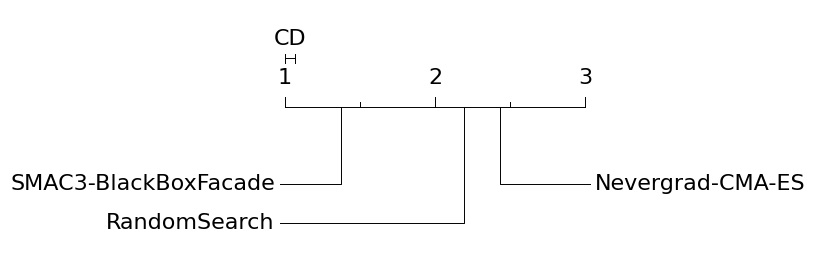

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/tmp/ipykernel_3735759/3381051715.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_ranks["set_id"] = set_id


SMAC3-BlackBoxFacade    1.374508
RandomSearch            2.194797
Nevergrad-CMA-ES        2.430695
set_id                      full
Name: meanrank, dtype: object ['SMAC3-BlackBoxFacade', 'RandomSearch', 'Nevergrad-CMA-ES'] []
test


[10:15:45] INFO     Lost following experiments: Empty DataFrame                                 ]8;id=936864;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=60792;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#113\113]8;;\
                    Columns: [Nevergrad-CMA-ES, RandomSearch, SMAC3-BlackBoxFacade]                                
                    Index: []                                                                                      

Rejecting null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.000060<0.016667)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.000063<0.016667)
Rejecting null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.003134<0.016667)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.
                      meanrank    median       mad  ci_lower  ci_upper  \
SMAC3-BlackBoxFacade  1.183333  0.251872  0.251872  0.000008  0.623703   
RandomSearch          2.116667  0.751662  0.231896  0.001708  0.971011   
Nevergrad-CMA-ES      2.700000  0.728307  0.267123  0.009254  0.981417   

                     effect_size   magnitude  
SMAC3-BlackBoxFacade         0.0  negligible  
RandomSearch           -1.392473       large  
Nevergrad-

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:233: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)],
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:241: FutureWarning: Series.__getitem__ treating ke

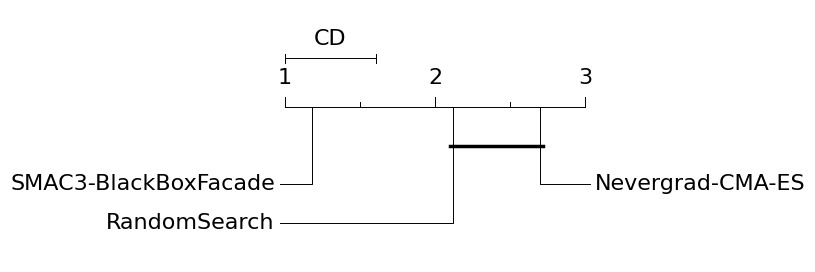

SMAC3-BlackBoxFacade    1.183333
RandomSearch            2.116667
Nevergrad-CMA-ES             2.7
set_id                      test
Name: meanrank, dtype: object ['SMAC3-BlackBoxFacade', 'RandomSearch', 'Nevergrad-CMA-ES'] [(1, 2)]


/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/tmp/ipykernel_3735759/3381051715.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_ranks["set_id"] = set_id


In [5]:
from autorank._util import get_sorted_rank_groups

perf_col: str = "trial_value__cost_inc_norm"

ranks_per_set = []
for set_id, gdf in df.groupby("set"):
    print(set_id)
    identifier = f"{scenario}_{set_id}"
    result = calc_critical_difference(gdf, identifier=identifier, figsize=(8, 3), perf_col=perf_col)
    sorted_ranks, names, groups = get_sorted_rank_groups(result, reverse=False)
    sorted_ranks["set_id"] = set_id
    ranks_per_set.append(sorted_ranks)
    print(sorted_ranks, names, groups)

In [6]:
df_ranks_per_set = pd.DataFrame(ranks_per_set)
df_t = pd.DataFrame([{r["set_id"]: list(r.index[:3])} for r in ranks_per_set])
new_cols = ["set_id"] + [c for c in df_ranks_per_set.columns if c != "set_id"]
df_ranks_per_set = df_ranks_per_set[new_cols]
df_ranks_per_set.to_csv(f"ranks_per_set_{scenario}.csv", index=False)
df_ranks_per_set

,set_id,SMAC3-BlackBoxFacade,RandomSearch,Nevergrad-CMA-ES
meanrank,dev,1.233333,2.083333,2.683333
meanrank,full,1.374508,2.194797,2.430695
meanrank,test,1.183333,2.116667,2.700000


In [47]:
import pandas as pd
import numpy as np

fns = ["ranks_per_set_blackbox.csv", "ranks_per_set_MOMF.csv", "ranks_per_set_multifidelity.csv", "ranks_per_set_multiobjective.csv"]
data = []
decimal_places = 2
sorter = ["full", "dev", "test"]

final_str = r"""
\begin{{table}}[h]
    \caption{{{caption}}}
    \label{{{label}}}
    \centering
    %\resizebox{{0.4\textwidth}}{{!}}{{
    {table_string}
    %}}
\end{{table}}
"""

float_format = lambda x: ("{:0." + str(decimal_places) + "f}").format(x) if not np.isnan(x) else "-"
for fn in fns:
    df = pd.read_csv(fn)

    df = df.sort_values(by="set_id", key=lambda column: column.map(lambda e: sorter.index(e)))
    df = df.set_index("set_id")
    df = df.map(lambda x: f"{x:.2f}" if not isinstance(x, str) else x)
    ranks = df.T.rank().T
    for i, ((idx, row), (idx2, row2)) in enumerate(zip(df.iterrows(), ranks.iterrows())):
        for j in range(len(row)):
            row.iloc[j] = row.iloc[j] + f" ({int(row2.iloc[j])})"
    scenario = fn.split("_")[-1].split(".")[0]   

    df.index.name = "set"
    
    table_str = df.to_latex(float_format=float_format, na_rep="-").strip()
    caption = f"Mean Ranking for Scenario {scenario}"
    label = f"tab:ranking_validation_{scenario}"
    table_str = final_str.format(table_string=table_str, label=label, caption=caption)

    with open(fn + ".tex", "w") as file:
        file.write(table_str)
    print(table_str)


\begin{table}[h]
    \caption{Mean Ranking for Scenario blackbox}
    \label{tab:ranking_validation_blackbox}
    \centering
    %\resizebox{0.4\textwidth}{!}{
    \begin{tabular}{llll}
\toprule
 & SMAC3-BlackBoxFacade & RandomSearch & Nevergrad-CMA-ES \\
set &  &  &  \\
\midrule
full & 1.37 (1) & 2.19 (2) & 2.43 (3) \\
dev & 1.23 (1) & 2.08 (2) & 2.68 (3) \\
test & 1.18 (1) & 2.12 (2) & 2.70 (3) \\
\bottomrule
\end{tabular}
    %}
\end{table}


\begin{table}[h]
    \caption{Mean Ranking for Scenario MOMF}
    \label{tab:ranking_validation_MOMF}
    \centering
    %\resizebox{0.4\textwidth}{!}{
    \begin{tabular}{llll}
\toprule
 & SMAC3-MOMF-GP & RandomSearch & Nevergrad-DE \\
set &  &  &  \\
\midrule
full & 1.63 (1) & 1.78 (2) & 2.59 (3) \\
dev & 1.56 (1) & 1.78 (2) & 2.67 (3) \\
test & 1.44 (1) & 2.00 (2) & 2.56 (3) \\
\bottomrule
\end{tabular}
    %}
\end{table}


\begin{table}[h]
    \caption{Mean Ranking for Scenario multifidelity}
    \label{tab:ranking_validation_multifidelity